# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
opt=['SDG','RMSprop','AdaGrad','Adam']

In [25]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "%s-exp-lr-%s" %(opt[0],str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "%s-exp-lr-%s" %(opt[1],str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "%s-exp-lr-%s" %(opt[2],str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "%s-exp-lr-%s" %(opt[3],str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4743 - accuracy: 0.4800 - val_loss: 1.6532 - val_accuracy: 0.4246
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4815 - accuracy: 0.4804 - val_loss: 1.6811 - val_accuracy: 0.4187
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.9067 - accuracy: 0.6831 - val_loss: 1.3684 - val_accuracy: 0.5350
Epoch 48/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.8928 - accuracy: 0.6884 - val_loss: 1.3806 - val_accuracy: 0.5287
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.8828 - accuracy: 0.6910 - val_loss: 1.4384 - val_accuracy: 0.5190
Epoch 50/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.8664 - accuracy: 0.6968 - val_loss: 1.4247 - val_accuracy: 0.5283
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

50000/50000 [==============================] - 7s 136us/step - loss: 2.3077 - accuracy: 0.1007 - val_loss: 2.3206 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3077 - accuracy: 0.0992 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3078 - accuracy: 0.1003 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3083 - accuracy: 0.0968 - val_loss: 2.3112 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3077 - accuracy: 0.0988 - val_loss: 2.3133 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3083 - accuracy: 0.0986 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3075 - accuracy: 0.1000 - val_loss:

Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8692 - accuracy: 0.6861 - val_loss: 1.8252 - val_accuracy: 0.4853
Epoch 43/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8525 - accuracy: 0.6930 - val_loss: 1.8666 - val_accuracy: 0.4695
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8441 - accuracy: 0.6967 - val_loss: 1.8057 - val_accuracy: 0.4649
Epoch 45/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8281 - accuracy: 0.7026 - val_loss: 1.9006 - val_accuracy: 0.4682
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8191 - accuracy: 0.7056 - val_loss: 1.9450 - val_accuracy: 0.4780
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8040 - accuracy: 0.7103 - val_loss: 2.1026 - val_accuracy: 0.4416
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.7979 - accuracy: 0.7132

50000/50000 [==============================] - 6s 129us/step - loss: 1.4268 - accuracy: 0.4922 - val_loss: 1.5128 - val_accuracy: 0.4615
Epoch 40/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4328 - accuracy: 0.4886 - val_loss: 1.5414 - val_accuracy: 0.4483
Epoch 41/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4150 - accuracy: 0.4936 - val_loss: 1.5270 - val_accuracy: 0.4608
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4126 - accuracy: 0.4949 - val_loss: 1.7584 - val_accuracy: 0.3995
Epoch 43/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4066 - accuracy: 0.4983 - val_loss: 1.6440 - val_accuracy: 0.4188
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4084 - accuracy: 0.4990 - val_loss: 1.6253 - val_accuracy: 0.4246
Epoch 45/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3923 - accuracy: 0.5009 - val_loss:

Epoch 37/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.3168 - accuracy: 0.5450 - val_loss: 1.4261 - val_accuracy: 0.4910
Epoch 38/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3121 - accuracy: 0.5469 - val_loss: 1.4061 - val_accuracy: 0.4985
Epoch 39/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3069 - accuracy: 0.5464 - val_loss: 1.4137 - val_accuracy: 0.5005
Epoch 40/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3025 - accuracy: 0.5492 - val_loss: 1.3909 - val_accuracy: 0.5071
Epoch 41/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.2972 - accuracy: 0.5510 - val_loss: 1.4018 - val_accuracy: 0.5001
Epoch 42/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2929 - accuracy: 0.5524 - val_loss: 1.3881 - val_accuracy: 0.5057
Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2884 - accuracy: 0.5538

50000/50000 [==============================] - 8s 169us/step - loss: 2.3082 - accuracy: 0.0987 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3072 - accuracy: 0.0996 - val_loss: 2.3066 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.3067 - accuracy: 0.0989 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.3070 - accuracy: 0.1001 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.3063 - accuracy: 0.0997 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.3066 - accuracy: 0.0991 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.3066 - accuracy: 0.1005 - val_loss:

Epoch 32/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.8961 - accuracy: 0.6787 - val_loss: 1.4475 - val_accuracy: 0.5250
Epoch 33/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.8871 - accuracy: 0.6822 - val_loss: 1.4867 - val_accuracy: 0.5212
Epoch 34/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.8627 - accuracy: 0.6911 - val_loss: 1.5167 - val_accuracy: 0.5211
Epoch 35/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.8442 - accuracy: 0.6979 - val_loss: 1.5354 - val_accuracy: 0.5195
Epoch 36/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.8338 - accuracy: 0.7031 - val_loss: 1.4983 - val_accuracy: 0.5242
Epoch 37/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.8150 - accuracy: 0.7070 - val_loss: 1.5297 - val_accuracy: 0.5173
Epoch 38/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8156 - accuracy: 0.7087

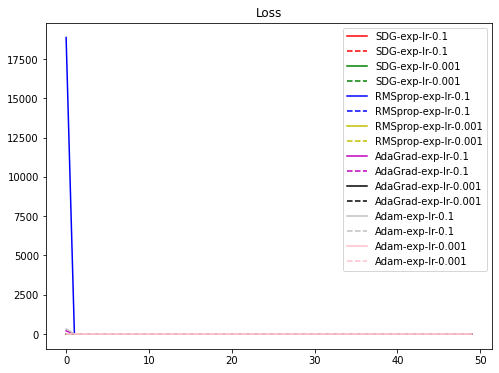

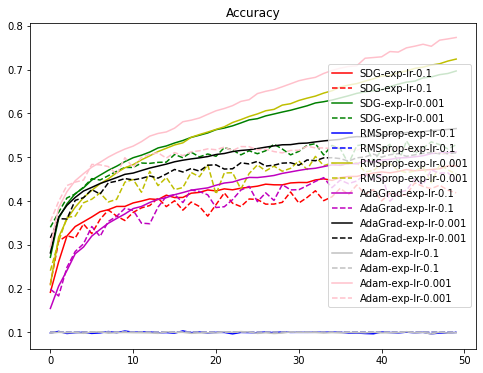

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k","silver",'pink']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()